<a href="https://colab.research.google.com/github/ben-wycliff/dl-final-exam/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!unzip -q "/content/drive/MyDrive/School/MSc Computer Science/Sem2 - (Ben Wycliff) - Year 1/Deep Learning/deep learning final exam/dataset.zip"

In [36]:
import os
import random
import cv2
import shutil
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import albumentations as A

# from fastai import *
from PIL import Image
from fastai.vision.data import ImageDataLoaders
from fastai.metrics import error_rate

In [3]:
data_path = "./dataset"
categories = os.listdir(data_path)
img_count = []
for category in categories:
  count = len(os.listdir(os.path.join(data_path, category)))
  img_count.append(count)

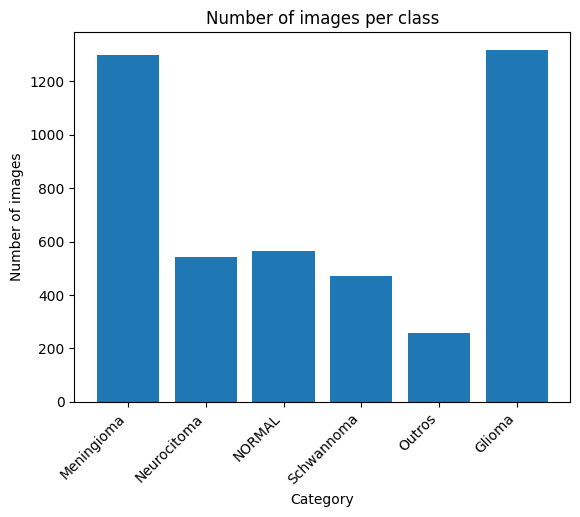

In [4]:
ticks = [0, 1, 2, 3, 4, 5]
plt.bar(ticks, img_count)
plt.title("Number of images per class")
plt.xticks(ticks, labels=categories, rotation=45, ha="right");
plt.ylabel("Number of images")
plt.xlabel("Category")
plt.show()

In [5]:
random.seed(40)

In [6]:
def plot_images_from_folder(folder_path, num_images=3, grid_size=(6, 3)):
    fig, axes = plt.subplots(*grid_size, figsize=(8, 15))
    title = "Sample preview of all the images "\
            "in the dataset from different categories"
    fig.suptitle(title, fontsize="x-large")

    axes = axes.flatten()
    for i, subfolder in enumerate(os.listdir(folder_path)):
        subfolder_path = os.path.join(folder_path, subfolder)

        if os.path.isdir(subfolder_path):
            image_files = os.listdir(subfolder_path)
            selected_images = random.sample(image_files, min(num_images, len(image_files)))

            for j, image_file in enumerate(selected_images):
                image_path = os.path.join(subfolder_path, image_file)
                img = mpimg.imread(image_path)

                # convert image to grayscale
                img = Image.open(image_path).convert('L')
                img = np.array(img)

                axes[i*grid_size[1]+j].set_title(subfolder)
                axes[i*grid_size[1]+j].imshow(img, cmap='gray')
                axes[i*grid_size[1]+j].axis('off')
    plt.tight_layout()
    plt.show();

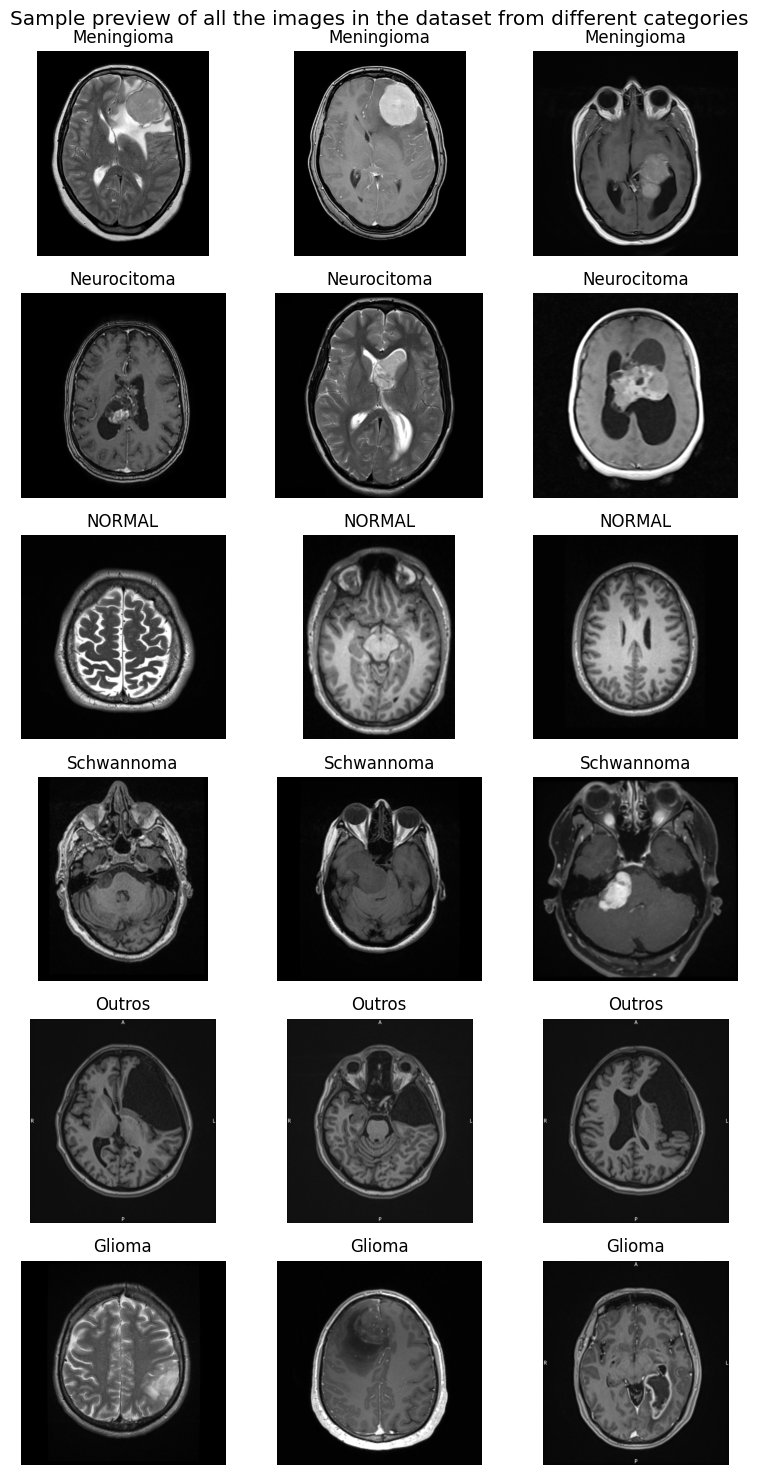

In [7]:
plot_images_from_folder("./dataset")

In [8]:
def count_image_shapes(folder_path, channels=False, shape=True):
    counts = {}

    # Iterate over subfolders and images
    for root, dirs, files in os.walk(folder_path):
        for file in files:
          # Read the image
          image_path = os.path.join(root, file)
          image = cv2.imread(image_path)

          # Get the image shape
          if channels:
            shape = image.shape[2]  
          else:
            shape = image.shape[:2] # Consider only height and width, ignoring color channels

          # Update the shape counts dictionary
          if shape in counts:
              counts[shape] += 1
          else:
              counts[shape] = 1

    return counts

In [9]:
image_count_per_channel_category = count_image_shapes("./dataset", channels=True)

In [10]:
image_count_per_channel_category

{3: 4448}

In [11]:
image_count_per_shape = count_image_shapes("./dataset")

In [32]:
print(image_count_per_shape.keys())

dict_keys([(630, 630), (590, 471), (465, 380), (630, 524), (630, 474), (630, 549), (477, 385), (630, 591), (630, 573), (630, 590), (479, 401), (540, 437), (630, 483), (481, 415), (630, 514), (538, 492), (541, 468), (546, 469), (485, 425), (630, 602), (490, 385), (539, 451), (584, 457), (630, 528), (630, 575), (570, 630), (630, 536), (517, 497), (552, 470), (505, 440), (498, 410), (498, 395), (535, 446), (563, 459), (524, 440), (630, 571), (519, 467), (497, 402), (630, 551), (614, 509), (587, 464), (630, 566), (630, 472), (526, 469), (630, 548), (489, 413), (518, 484), (461, 381), (580, 489), (540, 464), (527, 379), (560, 469), (478, 371), (538, 444), (500, 412), (471, 414), (490, 409), (511, 425), (514, 387), (423, 354), (572, 473), (537, 467), (630, 531), (582, 474), (566, 461), (486, 389), (524, 443), (588, 477), (529, 421), (474, 412), (456, 384), (476, 382), (502, 435), (524, 471), (566, 467), (501, 439), (528, 400), (433, 390), (455, 386), (630, 513), (509, 373), (554, 630), (490,

In [33]:
print(image_count_per_shape.values())

dict_values([2384, 27, 14, 52, 6, 67, 5, 17, 38, 30, 5, 4, 5, 5, 41, 4, 4, 35, 1, 18, 7, 6, 5, 6, 24, 3, 25, 1, 5, 6, 8, 5, 4, 20, 6, 306, 12, 7, 72, 8, 7, 7, 6, 4, 20, 7, 1, 27, 20, 5, 1, 1, 7, 5, 7, 3, 3, 7, 1, 1, 6, 5, 6, 4, 6, 3, 6, 3, 7, 1, 1, 7, 4, 1, 5, 8, 1, 1, 1, 4, 1, 3, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 6, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 29, 26, 34, 11, 36, 24, 1, 5, 10, 10, 34, 17, 13, 16, 1, 8, 2, 1, 8, 1, 6, 1, 1, 1, 12, 1, 24, 64, 1, 1, 1, 1, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 35, 11, 6, 5, 5, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 4, 5, 1, 1, 1, 1, 1, 1, 1, 5, 8, 3, 21, 22, 14, 1, 6, 2, 6, 46, 28, 32, 6, 1, 7, 7, 1, 6, 14, 6, 4, 2, 1, 1, 1, 4, 18, 5, 4, 1, 13, 3, 1, 1, 1, 1, 7, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1])


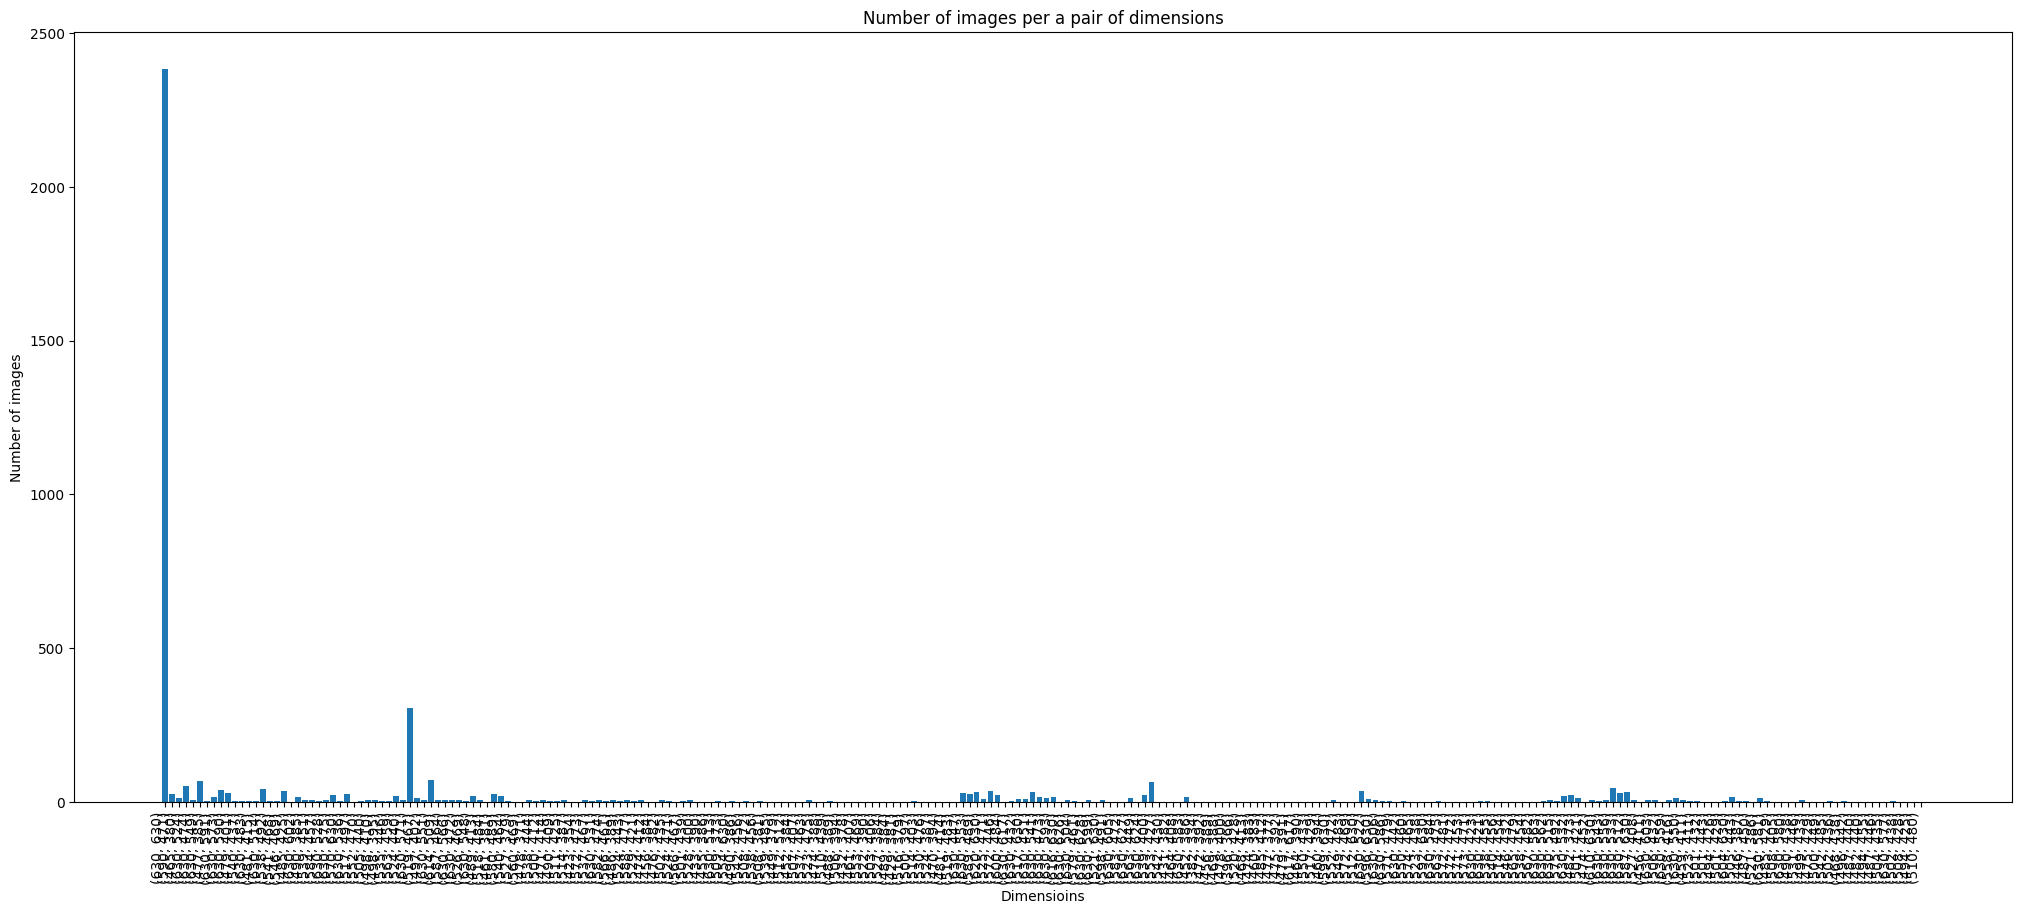

In [14]:
ticks = [i for i in range(len(image_count_per_shape))]
plt.figure(figsize=(25, 10))
plt.bar(ticks, image_count_per_shape.values())
plt.title("Number of images per a pair of dimensions")
plt.xticks(ticks, labels=image_count_per_shape.keys(), rotation=90, ha="right");
plt.ylabel("Number of images")
plt.xlabel("Dimensioins")
plt.show()

In [15]:
len(image_count_per_shape)

252

In [16]:
image_shape_ratios = [i[1]/i[0] for i in image_count_per_shape.keys()]

In [17]:
image_shape_ratios_thres = [1 if i > 0.8 else i for i in image_shape_ratios]

In [31]:
print(image_shape_ratios_thres)

[1, 0.7983050847457627, 1, 1, 0.7523809523809524, 1, 1, 1, 1, 1, 1, 1, 0.7666666666666667, 1, 1, 1, 1, 1, 1, 1, 0.7857142857142857, 1, 0.7825342465753424, 1, 1, 1, 1, 1, 1, 1, 1, 0.7931726907630522, 1, 1, 1, 1, 1, 1, 1, 1, 0.7904599659284497, 1, 0.7492063492063492, 1, 1, 1, 1, 1, 1, 1, 0.7191650853889943, 1, 0.7761506276150628, 1, 1, 1, 1, 1, 0.7529182879377432, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.7958412098298677, 1, 1, 1, 1, 1, 1, 1, 0.7575757575757576, 1, 1, 1, 0.7328094302554028, 1, 0.7877551020408163, 1, 1, 1, 0.75, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.7971311475409836, 0.7786561264822134, 1, 1, 1, 0.7471264367816092, 1, 0.7286527514231499, 0.7852760736196319, 1, 0.7344961240310077, 0.794, 0.7840466926070039, 1, 0.7385496183206107, 1, 1, 1, 0.7095238095238096, 1, 1, 1, 1, 0.7797202797202797, 1, 1, 0.6857142857142857, 1, 0.7158730158730159, 1, 0.7507936507936508, 1, 1, 1, 0.8, 0.7962003454231433, 1, 1, 1, 1, 1, 1, 1, 0.7975133214920072, 1, 0.7421150278293135, 0.7721518987341772, 0.793357933579335

In [43]:
from tqdm import tqdm
categories = os.listdir('./dataset')

def convert_webp2jpg(src, dst):
  img = Image.open(src).convert("RGB")
  img.save(dst, "jpeg")
  return

def copy_img2dest(src, dst, img):
  if "webp" in img:
    convert_webp2jpg(os.path.join(src, img),
                        os.path.join(dst, img.split(".")[0]+".jpg"))
  else:
    shutil.copy(os.path.join(src, img),
                  os.path.join(dst, img))
  return

def populate_partition(name):
  src = f"./dataset/{name}/"
  par_imgs = os.listdir(src)
  #populate partitions
  for i, img in tqdm(enumerate(par_imgs)):
    # validation 60
    if i < 60:
      # print(f"creating validation partition for {name}")
      dst = f"data/val/{name}/"
      copy_img2dest(src, dst, img)
    # test 100
    elif i > 60 and i <= 160:
      # print(f"creating test partion for {name}")
      dst = f"data/test/{name}/"
      copy_img2dest(src, dst, img)
    # train for the rest
    else:
      # print(f"creating train partition for {name}")
      dst = f"data/train/{name}/"
      copy_img2dest(src, dst, img)
  return

for cat in categories:
  os.makedirs(f"./data/train/{cat}", exist_ok=True)
  os.makedirs(f"./data/test/{cat}", exist_ok=True)
  os.makedirs(f"./data/val/{cat}", exist_ok=True)
  populate_partition(cat)

1299it [00:00, 2593.21it/s]
542it [00:00, 4618.09it/s]
563it [00:00, 4268.86it/s]
470it [00:00, 2638.45it/s]
257it [00:00, 3308.56it/s]
1317it [00:01, 924.44it/s]


In [45]:
for part in ["test", "train", "val"]:
  print(f"\nFile count in partition {part}")
  subdirectories = glob.glob(os.path.join(f"data/{part}", '*'))

  # Iterate over each subdirectory and print the file count
  for subdirectory in subdirectories:
      # Get the file count for the current subdirectory
      file_count = len(os.listdir(subdirectory))
      
      # Print the subdirectory name and file count
      print(f"Subdirectory: {subdirectory} - {file_count}")


File count in partition test
Subdirectory: data/test/Meningioma - 100
Subdirectory: data/test/Neurocitoma - 100
Subdirectory: data/test/NORMAL - 100
Subdirectory: data/test/Schwannoma - 100
Subdirectory: data/test/Outros - 100
Subdirectory: data/test/Glioma - 100

File count in partition train
Subdirectory: data/train/Meningioma - 1139
Subdirectory: data/train/Neurocitoma - 382
Subdirectory: data/train/NORMAL - 403
Subdirectory: data/train/Schwannoma - 310
Subdirectory: data/train/Outros - 97
Subdirectory: data/train/Glioma - 1157

File count in partition val
Subdirectory: data/val/Meningioma - 60
Subdirectory: data/val/Neurocitoma - 60
Subdirectory: data/val/NORMAL - 60
Subdirectory: data/val/Schwannoma - 60
Subdirectory: data/val/Outros - 60
Subdirectory: data/val/Glioma - 60


In [56]:
# let's augment the train set using albumentations
def augment_images(folder_path, max_img_count):
    # Define the augmentation pipeline
    transform = A.Compose([
        A.CLAHE(),
        A.Blur(),
        A.MedianBlur(),
        A.Sharpen(),
        A.RandomBrightnessContrast(),  
        # Add more augmentations if needed
    ])

    # Get the list of image files in the folder
    image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    img_count = len(image_files)
    while img_count < max_img_count:
      # Randomly select images
      file = random.sample(image_files, 1)

      # Generate augmented versions of the selected images
      # Read the image
      image_path = os.path.join(folder_path, file[0])
      image = cv2.imread(image_path)

      # Apply the augmentation pipeline
      augmented = transform(image=image)

      # Save the augmented images
        # for i in range(num_augmentations):
      augmented_image = augmented['image']
      augmented_file = f"{file[0].split('.')[0]}_augmented_{img_count}.jpg"  # Modify the filename as per your preference
      augmented_path = os.path.join(folder_path, augmented_file)
      cv2.imwrite(augmented_path, augmented_image)
      img_count += 1
      print(f"Generated {img_count - len(image_files)} augmented versions of {file}.")


In [57]:
augment_images("data/train/Outros", 1157)

Generated 1 augmented versions of ['img4298outros (17).jpeg'].
Generated 2 augmented versions of ['img4425outros (23).jpeg'].
Generated 3 augmented versions of ['img4409outros (1).jpg'].
Generated 4 augmented versions of ['img4287outros (103).jpeg'].
Generated 5 augmented versions of ['img2064outros (30).jpeg'].
Generated 6 augmented versions of ['img4313outros (12).jpg'].
Generated 7 augmented versions of ['img4303outros (50).jpeg'].
Generated 8 augmented versions of ['img4289outros (54).jpeg'].
Generated 9 augmented versions of ['img4239outros (5).jpg'].
Generated 10 augmented versions of ['img4367outros (20).jpg'].
Generated 11 augmented versions of ['img4439outros (48).jpeg'].
Generated 12 augmented versions of ['img4381outros (111).jpeg'].
Generated 13 augmented versions of ['img2099outros (21).jpeg'].
Generated 14 augmented versions of ['img4428outros (33).jpeg'].
Generated 15 augmented versions of ['img4281outros (12).jpeg'].
Generated 16 augmented versions of ['img4311outros (8

In [59]:
augment_images("data/train/Meningioma", 1157)
augment_images("data/train/NORMAL", 1157)
augment_images("data/train/Neurocitoma", 1157)
augment_images("data/train/Schwannoma", 1157)

Generated 1 augmented versions of ['img774meningioma (28).jpeg'].
Generated 2 augmented versions of ['img2564meningioma (4).jpeg'].
Generated 3 augmented versions of ['img2692meningioma (231).jpg'].
Generated 4 augmented versions of ['img1736meningioma (42).jpg'].
Generated 5 augmented versions of ['img1990meningioma (13).jpeg'].
Generated 6 augmented versions of ['img2211meningioma (382).jpeg'].
Generated 7 augmented versions of ['img1803meningioma (118).jpg'].
Generated 8 augmented versions of ['img2460meningioma (272).jpeg'].
Generated 9 augmented versions of ['img2031meningioma (119).jpg'].
Generated 10 augmented versions of ['img1716meningioma (170).jpeg'].
Generated 11 augmented versions of ['img2655meningioma (75).jpg'].
Generated 12 augmented versions of ['img2654meningioma (375).jpeg'].
Generated 13 augmented versions of ['img1949meningioma (57).jpeg'].
Generated 14 augmented versions of ['img2675meningioma (290).jpeg'].
Generated 15 augmented versions of ['img1033meningioma (

In [60]:
for part in ["test", "train", "val"]:
  print(f"\nFile count in partition {part}")
  subdirectories = glob.glob(os.path.join(f"data/{part}", '*'))

  # Iterate over each subdirectory and print the file count
  for subdirectory in subdirectories:
      # Get the file count for the current subdirectory
      file_count = len(os.listdir(subdirectory))
      
      # Print the subdirectory name and file count
      print(f"Subdirectory: {subdirectory} - {file_count}")


File count in partition test
Subdirectory: data/test/Meningioma - 100
Subdirectory: data/test/Neurocitoma - 100
Subdirectory: data/test/NORMAL - 100
Subdirectory: data/test/Schwannoma - 100
Subdirectory: data/test/Outros - 100
Subdirectory: data/test/Glioma - 100

File count in partition train
Subdirectory: data/train/Meningioma - 1157
Subdirectory: data/train/Neurocitoma - 1157
Subdirectory: data/train/NORMAL - 1157
Subdirectory: data/train/Schwannoma - 1157
Subdirectory: data/train/Outros - 1157
Subdirectory: data/train/Glioma - 1157

File count in partition val
Subdirectory: data/val/Meningioma - 60
Subdirectory: data/val/Neurocitoma - 60
Subdirectory: data/val/NORMAL - 60
Subdirectory: data/val/Schwannoma - 60
Subdirectory: data/val/Outros - 60
Subdirectory: data/val/Glioma - 60


In [61]:
!zip -r data.zip data

Streaming output truncated to the last 5000 lines.
  adding: data/train/Neurocitoma/img3873neurocitoma (54)_augmented_699.jpg (deflated 7%)
  adding: data/train/NORMAL/ (stored 0%)
  adding: data/train/NORMAL/img1456normal (1)_augmented_731.jpg (deflated 4%)
  adding: data/train/NORMAL/img1302normal (19)_augmented_1103.jpg (deflated 2%)
  adding: data/train/NORMAL/img1486normal (101)_augmented_463.jpg (deflated 3%)
  adding: data/train/NORMAL/img1548normal (47)_augmented_622.jpg (deflated 1%)
  adding: data/train/NORMAL/img1046normal (98)_augmented_581.jpg (deflated 7%)
  adding: data/train/NORMAL/img1545normal (192)_augmented_959.jpg (deflated 2%)
  adding: data/train/NORMAL/img1040normal (144)_augmented_458.jpg (deflated 4%)
  adding: data/train/NORMAL/img1273normal (75)_augmented_670.jpg (deflated 5%)
  adding: data/train/NORMAL/img1304normal (40)_augmented_844.jpg (deflated 3%)
  adding: data/train/NORMAL/img1172normal (38)_augmented_851.jpg (deflated 1%)
  adding: data/train/NORMA

In [62]:
!cp data.zip "/content/drive/MyDrive/School/MSc Computer Science/Sem2 - (Ben Wycliff) - Year 1/Deep Learning/deep learning final exam/"